<a href="https://colab.research.google.com/github/sol-ops/gpt3-leukemia-information-assistant/blob/main/leukemia_detection_by_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
import tensorflow


In [100]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [101]:
IMAGE_SIZE=[224,224]
train_path='/content/drive/MyDrive/data/train'
vlid_path='/content/drive/MyDrive/data/validation'

In [104]:
vgg16=VGG16(input_shape=IMAGE_SIZE +[3],weights='imagenet',include_top=False)

In [105]:
for layer in vgg16.layers:
  layer.trainable=False

In [106]:
folders=glob('/content/drive/MyDrive/data/train/*')

In [107]:
folders

['/content/drive/MyDrive/data/train/normal',
 '/content/drive/MyDrive/data/train/leukumized']

In [108]:
x=Flatten()(vgg16.output)

In [109]:
prediction=Dense(len(folders),activation='softmax')(x)

In [110]:
model=Model(inputs=vgg16.input,outputs=prediction)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [111]:
model.compile(
loss='categorical_crossentropy',
optimizer='Adam',
metrics=['accuracy']
)

In [112]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1/255)




In [113]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/data/train',target_size=(224,224),
                                               batch_size=16,
                                               class_mode='categorical')

Found 100 images belonging to 2 classes.


In [114]:
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/data/test',
                                          target_size=(224,224),
                                          batch_size=16,
                                          class_mode='categorical')

Found 10 images belonging to 2 classes.


In [115]:
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

<ipython-input-115-b4b2878d2ea9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
7/7 [==============================] - 64s 9s/step - loss: 0.5508 - accuracy: 0.7200 - val_loss: 0.1188 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 62s 9s/step - loss: 0.1105 - accuracy: 0.9500 - val_loss: 0.2053 - val_accuracy: 0.9000
Epoch 3/10
7/7 [==============================] - 62s 10s/step - loss: 0.0901 - accuracy: 0.9800 - val_loss: 0.1030 - val_accuracy: 0.9000
Epoch 4/10
7/7 [==============================] - 62s 9s/step - loss: 0.0632 - accuracy: 0.9800 - val_loss: 0.0214 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 66s 10s/step - loss: 0.0435 - accuracy: 0.9800 - val_loss: 0.0459 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 62s 9s/step - loss: 0.0240 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 67s 10s/step - loss: 0.0186 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 8/10
7/7 [===============

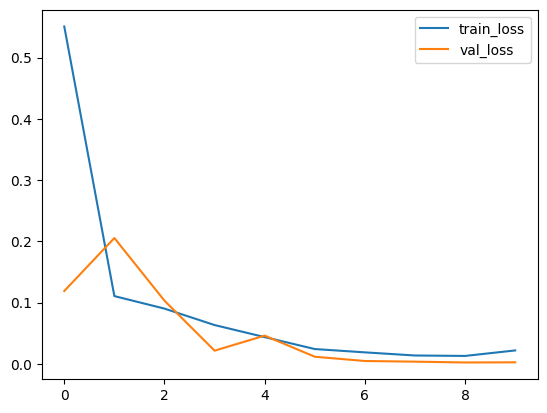

<Figure size 640x480 with 0 Axes>

In [116]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


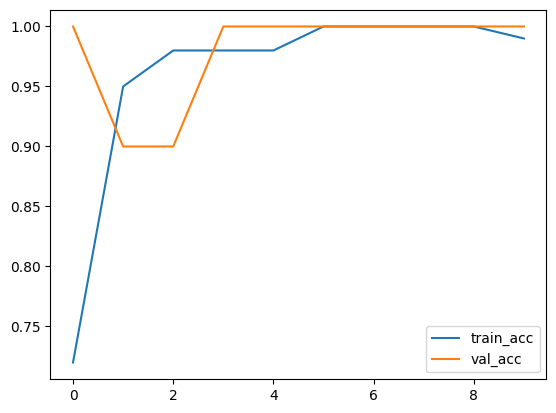

TypeError: ignored

<Figure size 640x480 with 0 Axes>

In [117]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
plt.savefig()